# Лабораторная работа 1. Вариант 5.

In [2]:
import pandas as pd
import numpy as np

## Задание 1

Загрузить данные из файла avianHabitat.csv. Подготовить данные для
дальнейшего анализа, убрав нулевые элемент. 

Делать это будем с помощью встроенных функций библиотеки pandas.

In [4]:
df = pd.DataFrame(pd.read_csv(r'avianHabitat.csv'))

df

,Site,Observer,Subpoint,VOR,PDB,DBHt,PW,WHt,PE,EHt,PA,AHt,PH,HHt,PL,LHt,PB
0,BunkerHill27,RA,1,6.0,3,5.2,0,0.0,4,2.9,0,0.0,4,3.0,0,0.0,0
1,BunkerHill27,RA,2,4.5,2,3.1,3,4.7,3,4.1,0,0.0,3,3.5,2,1.0,0
2,BunkerHill27,RA,3,2.0,4,5.5,1,5.8,3,3.9,0,0.0,3,7.5,0,0.0,0
3,BunkerHill27,RA,4,2.5,3,6.2,0,0.0,3,4.0,0,0.0,4,5.0,0,0.0,0
4,BunkerHill27,RA,5,4.0,4,5.4,0,0.0,3,3.5,0,0.0,4,3.7,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,McAdamCreek21,RR,6,1.0,0,0.0,3,1.0,2,2.2,0,0.0,4,3.3,0,0.0,0
1066,McAdamCreek21,RR,7,1.5,4,5.0,2,1.3,2,1.7,0,0.0,3,5.4,2,0.6,0
1067,McAdamCreek21,RR,8,8.0,0,0.0,5,10.2,3,1.5,0,0.0,1,2.6,1,0.7,0
1068,McAdamCreek21,RR,9,3.0,0,0.0,5,10.1,3,3.1,0,0.0,3,2.2,0,0.0,0


Посчитаем количество нулевых элементов

In [6]:
df.isna().sum()

Site        0
Observer    0
Subpoint    0
VOR         0
PDB         0
DBHt        0
PW          0
WHt         0
PE          0
EHt         0
PA          0
AHt         0
PH          0
HHt         0
PL          0
LHt         0
PB          0
dtype: int64

Как можем увидеть, пустых полей у нас нет, поэтому можем сразу перейти к анализу данных.

## Задание 2

Рассчитать для переменных, описывающих высоту растений (*Ht), следующие значения(по вариантам):
+ Максимальное и минимальное значения;
+ Размах распределения;
+ Среднее значения;
+ Медиану;
+ Моду;
+ Дисперсию;
+ Среднеквадратическое отклонение;
+ Первый и третий квартиль;
+ Интерквартильный размах;
+ Ассиметрию;
+ Эксцесс.

Большинство из данных значений можно получить с помощью функции df.describe(), которая выведет нам описательные статистики выбранной переменной. По варианту будем рассматривать переменную HHt

In [8]:
df['HHt'].describe()

count    1070.000000
mean        2.321028
std         1.280982
min         0.000000
25%         1.400000
50%         2.300000
75%         3.100000
max         8.200000
Name: HHt, dtype: float64

Отсюда видно, что:
+ Максимальное значение = 8.2, минимальное значение = 0;
+ Размах распределение = max - min = 8.2;
+ Среднее значение = 2.321028;
+ Первый квартиль = 1.4, третий квартиль = 3.1;
+ Интерквартильный размах = 3.1 - 1.4 = 1.7;
  
Для вычисления оставшихся значений воспользуемся функциями pandas.

In [10]:
print(f'Медиана = {df['HHt'].median()}')
print(f'Мода = {df['HHt'].mode()}')
print(f'Дисперсия = {df['HHt'].var()}')
print(f'Среднеквадратичное отклонение = {df['HHt'].var()**(1/2)}')
print(f'Ассиметрия = {df['HHt'].skew()}')
print(f'Эксцесс = {df['HHt'].kurtosis()}')

Медиана = 2.3
Мода = 0    2.2
Name: HHt, dtype: float64
Дисперсия = 1.640913815864245
Среднеквадратичное отклонение = 1.2809815829527935
Ассиметрия = 0.5319323371016482
Эксцесс = 0.8309991831944887


## Задание 3

Построить диаграмму с усами (boxplot) для Ваших данных.

Строить диаграмму будем с помощью библиотеки Seaborn

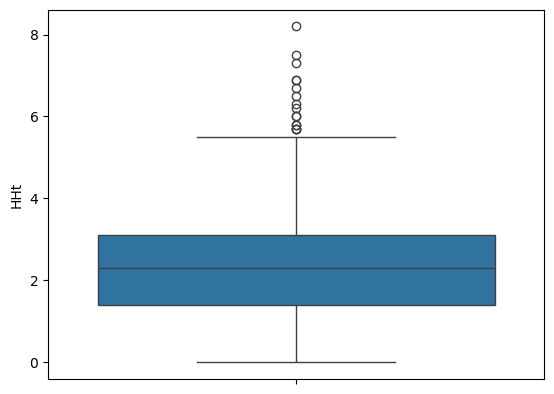

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.boxplot(df['HHt'])

plt.show()

## Задание 4

Построить на одном рисунке диаграммы с усами Вашего и соседнего варианта.

Дополнительно построим ящик с усами шестого варианта 6 (LHt).

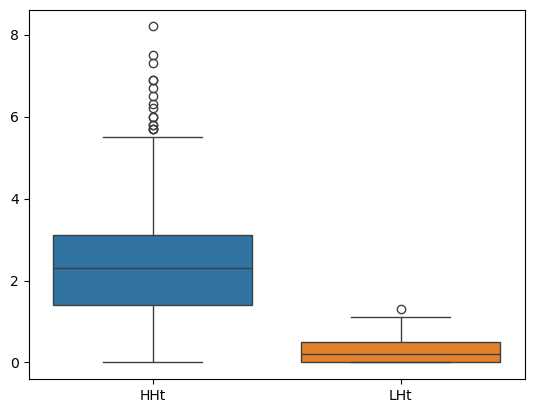

In [18]:
sns.boxplot(df[['HHt','LHt']])

plt.show()

## Задание 5

Построить эмпирическую функцию распределения (построить самим и
воспользоваться реализованными функциями (при наличии), сравнить
результат

Строить эмпирическую функцию будем путем деления каждого элемента нашего столбца на общее число элементов..

In [21]:
df_sorted = sorted(df['HHt'])

cdf = pd.DataFrame( {0: df_sorted, 1:np.arange(len(df_sorted))/len(df_sorted)} )
cdf

,0,1
0,0.0,0.000000
1,0.0,0.000935
2,0.0,0.001869
3,0.0,0.002804
4,0.0,0.003738
...,...,...
1065,6.9,0.995327
1066,6.9,0.996262
1067,7.3,0.997196
1068,7.5,0.998131


Построим график полученной эмпирической функции.

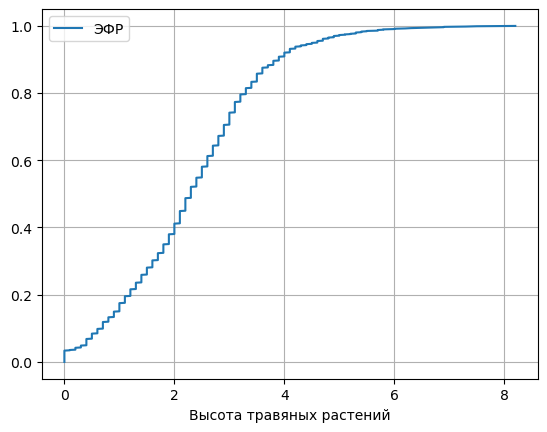

In [38]:
cdf.plot(0,1, grid=True, label='ЭФР', xlabel='Высота травяных растений')

plt.show()

Чтобы сравнить график, построенный вручную с тем, что предлагают встроенные библиотеки, отобразим два графика на одной СК. Так же для вывода о нормальности распредления нашей переменной, построим и ЭФР нормального распределения. 

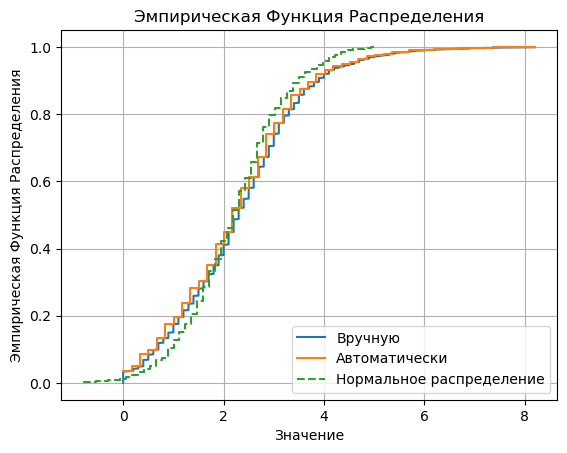

In [101]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf.plot(0, 1, grid=True, label='Вручную', xlabel='Высота травяных растений')

ecdf = ECDF(df['HHt'])
x = np.linspace(min(df['HHt']), max(df['HHt']))
y = ecdf(x)

plt.step(x, y, label='Автоматически')
plt.xlabel('Значение')
plt.ylabel('Эмпирическая Функция Распределения')

data_normal = np.random.normal(loc=2.3, scale=1, size=1000)
ecdf_normal = ECDF(data_normal)
x_normal = np.linspace(min(data_normal), max(data_normal))
y_normal = ecdf_normal(x_normal)

plt.step(x_normal, y_normal, label='Нормальное распределение', linestyle='--')
plt.title('Эмпирическая Функция Распределения')
plt.legend()
plt.grid(True)
plt.show()

Как видно на графике, различия присутствуют.

## Задание 6

Построить гистограмму вероятностей и сгладить её кривой.

Для этого воспользуемся библиотекой seaborn и ее функцией histplot, в которой можно сразу определить построение кривой, отображающей оценку ядерной плотности.


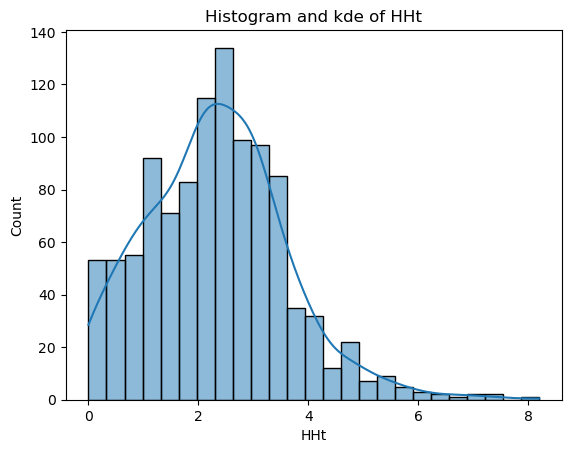

In [59]:
sns.histplot(df['HHt'], kde=True)

plt.title('Histogram and kde of HHt')
plt.show()

## Задание 7. 

Построить графики квантиль-квантиль (qq-plot).

Строить график квантиль-квантиль будем с помощью библиотеки statsmodels.

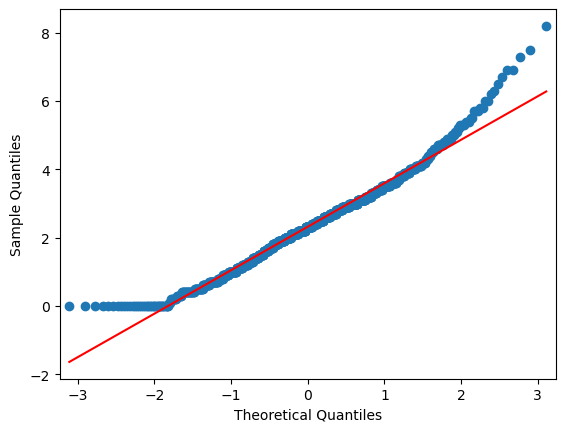

In [84]:
import statsmodels.api as sm

sm.qqplot(df['HHt'], line='r')

plt.show()

## Вывод

Выводы о нормальности распеределения нашей переменной стоит начать со второго задания, когда мы считали моду, медиану и среднее. Для того, чтобы не отклонять гипотезу о нормальности распеределения, необходимо, чтобы эти величины примерно совпадали, что у нас выполняется, поскольку среднее значение равно ~2.31, медиана равна 2.3, мода равна 2.2.

Далее перейдем к коэффициентам ассиметрии и эксцесса, а именно коэффициент ассиметрии показал нам, что наша выборка незначительно смещена вправо, коэффициент эксцесса указывает на то, что вершина распределения не является острой. Всё это всё еще позволяет нам не отвергать гипотезу о нормальном распределении.

На ящике с усами все наши предыдущие вывод подтверждаются, однако уже заметно некоторое количество аномальных значений.

При построении ЭФР не выявлено серьезных поводов для отклонения гипотезы о нормальном распределении.

Построенная гистограмма и ядерная оценка плотности подтверждают выводы, сделанные ранне.

График квантиль-квантиль показывает, что наше распределение на концах отрезка отклоняется от линии нормального распределения, однако это так же не является причиной для отклонения нулевой гипотезы. 

Сейчас можно сказать, что рассматриваемое распределение удовлетворяет нормальному распределению, однако для точного вывода необходимо провести больше исследований.